In [1]:
from keras.datasets import cifar10

Using TensorFlow backend.
/home/karim/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/karim/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/karim/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/karim/.local/lib/python3.7/site-packages/tensorflow/python/fra

In [11]:
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2976s 17us/step


In [138]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

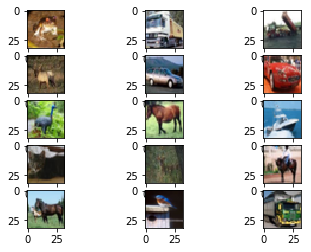

In [100]:

for i in range(0,15):
    plt.subplot(5,3,i+1)
    plt.imshow(X_train[i])
plt.show()    

In [109]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [110]:
#normalize the input from 0-255 to 0.0-1.0
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train=X_train/255.0
X_test=X_test/255.0

The output variables are defined as a vector of integers from 0 to 1 for each class.

We can use a one hot encoding to transform them into a binary matrix in order to best model the classification problem. We know there are 10 classes for this problem, so we can expect the binary matrix to have a width of 10.

In [111]:
# one hot encoded outputs
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

In [116]:
y_test.shape[1]

10

In [124]:
num_classes=y_test.shape[1]

We will use a structure with two convolutional layers followed by max pooling and a flattening out of the network to fully connected layers to make predictions.

Our baseline network structure can be summarized as follows:

    Convolutional input layer, 32 feature maps with a size of 3×3, a rectifier activation function and a weight constraint of max norm set to 3.
    Dropout set to 20%.
    Convolutional layer, 32 feature maps with a size of 3×3, a rectifier activation function and a weight constraint of max norm set to 3.
    Max Pool layer with size 2×2.
    Flatten layer.
    Fully connected layer with 512 units and a rectifier activation function.
    Dropout set to 50%.
    Fully connected output layer with 10 units and a softmax activation function.

A logarithmic loss function is used with the stochastic gradient descent optimization algorithm configured with a large momentum and weight decay start with a learning rate of 0.01.

In [133]:
model = Sequential()
model.add(Conv2D(32,(3,3) , input_shape=(32,32,3), padding='same',activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3), input_shape=(32,32,3) , padding='same', activation='relu',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [134]:
#compile model
epochs=3
lrate=0.1
decay = lrate/epochs

sgd=SGD(lr=lrate,momentum=0.9, decay=decay,nesterov=False)
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
#print(model.summary())

In [135]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)



Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 249s 5ms/step - loss: 1.9044 - accuracy: 0.3182 - val_loss: 1.8732 - val_accuracy: 0.3217
Epoch 2/3
50000/50000 [==============================] - 251s 5ms/step - loss: 1.6370 - accuracy: 0.4216 - val_loss: 1.5156 - val_accuracy: 0.4679
Epoch 3/3
50000/50000 [==============================] - 253s 5ms/step - loss: 1.5040 - accuracy: 0.4628 - val_loss: 1.3975 - val_accuracy: 0.5142


In [136]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 9s 926us/step


[1.397501342010498, 0.51419997215271]

In [137]:
model.predict(X_test[0])

ValueError: Error when checking input: expected conv2d_7_input to have 4 dimensions, but got array with shape (32, 32, 3)